# Tree based Analysis
## EQ5D - LQ-EQL 비교

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.estimators import plot_feature_importances

In [3]:
df = pd.read_csv('../datasets/20_dataset_3.csv')
df

,ID,sex,age,D_1_1,LQ_1EQL,LQ_2EQL,LQ_3EQL,LQ_4EQL,LQ_5EQL,EQ5D,...,HE_BMI,HE_obe,BM1_0,E_NWT,L_BR_FQ,LS_1YR,sub_health,eq5d_100,y_new,y_class
0,A801172802,2,58,1,1,1,1,1,1,1.0,...,26.6,4,1,1,1,1,100,100.0,10.0,2
1,A801177902,2,53,3,1,1,1,1,1,1.0,...,19.7,2,1,3,2,1,60,100.0,8.0,1
2,A801179602,2,53,3,1,1,1,1,1,1.0,...,24.0,3,1,4,1,1,60,100.0,8.0,1
3,A801218701,2,74,1,1,1,1,1,1,1.0,...,27.1,4,1,1,1,1,100,100.0,10.0,2
4,A801223802,2,47,3,1,1,1,1,1,1.0,...,26.9,4,1,4,3,2,60,100.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,R804363201,2,58,3,1,1,1,1,1,1.0,...,23.0,3,1,1,1,2,60,100.0,8.0,1
2934,R804366601,2,61,3,1,1,1,1,1,1.0,...,23.9,3,1,4,1,1,60,100.0,8.0,1
2935,R804368301,2,51,3,1,1,1,1,1,1.0,...,24.7,3,1,4,3,1,60,100.0,8.0,1
2936,R804371701,1,65,2,1,1,1,1,1,1.0,...,25.9,4,1,2,1,1,80,100.0,9.0,2


In [4]:
df['D_1_1'].value_counts()

3    1536
2     651
4     515
5     127
1     109
Name: D_1_1, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['D_1_1'] = le.fit_transform(df['D_1_1'])
df['LQ_1EQL'] = le.fit_transform(df['LQ_1EQL'])
df['LQ_2EQL'] = le.fit_transform(df['LQ_2EQL'])
df['LQ_3EQL'] = le.fit_transform(df['LQ_3EQL'])
df['LQ_4EQL'] = le.fit_transform(df['LQ_4EQL'])
df['LQ_5EQL'] = le.fit_transform(df['LQ_5EQL'])


In [6]:
x = df.loc[:,['LQ_1EQL','LQ_2EQL','LQ_3EQL','LQ_4EQL','LQ_5EQL']]
y = df.loc[:,'D_1_1']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

In [7]:
tree_boston = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_train, y_train), tree_boston.score(X_test, y_test)

(0.5514893617021277, 0.54421768707483)

<AxesSubplot: title={'center': 'Feature Importance'}>

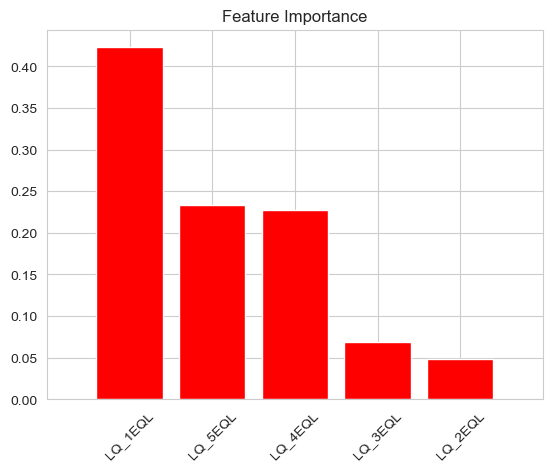

In [8]:
# Feature Importance
plot_feature_importances(tree_boston,
                         feature_names=x.columns,
                         x_tick_rotation=45)

위 결과는 0.5 부근에 위치하여 Decision Tree 가 아닌 다른 방법론들을 사용해보았다.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error


training_accuracy = []
test_accuracy = []

n_settings = [3, 5, 7, 10]
for n in n_settings:
    df_gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=n, random_state=42)
    df_gb.fit(X_train, y_train)

    y_train_hat = df_gb.predict(X_train)
    y_test_hat = df_gb.predict(X_test)

    training_accuracy.append(mean_squared_error(y_train, y_train_hat))
    test_accuracy.append(mean_squared_error(y_test, y_test_hat))


pd.DataFrame({"max_depth":n_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})


,max_depth,training accuracy,test accuracy
0,3,0.647660,0.680272
1,5,0.647660,0.683673
2,7,0.653191,0.712585
3,10,0.655745,0.693878


<AxesSubplot: title={'center': 'Feature Importance'}>

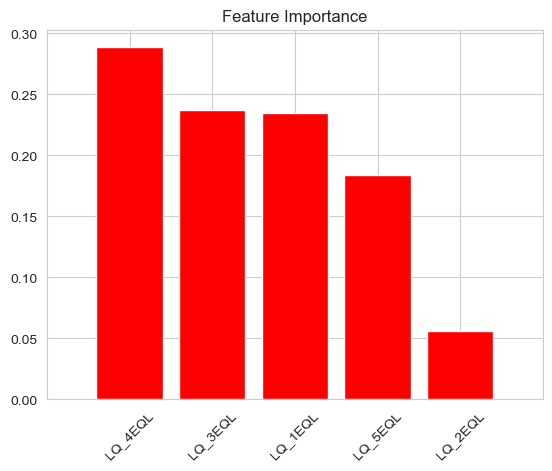

In [10]:
# Feature Importance
df_gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=7, random_state=42)
df_gb.fit(X_train, y_train)

plot_feature_importances(df_gb,
                         feature_names=x.columns,
                         x_tick_rotation=45)

In [11]:
training_accuracy = []
test_accuracy = []

n_settings = [100, 200, 300, 400, 500]
for n in n_settings:
    df_gb = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, max_depth=7, random_state=42)
    df_gb.fit(X_train, y_train)

    y_train_hat = df_gb.predict(X_train)
    y_test_hat = df_gb.predict(X_test)

    training_accuracy.append(mean_squared_error(y_train, y_train_hat))
    test_accuracy.append(mean_squared_error(y_test, y_test_hat))


pd.DataFrame({"n_estimators":n_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})


,n_estimators,training accuracy,test accuracy
0,100,0.646383,0.695578
1,200,0.646383,0.695578
2,300,0.646383,0.683673
3,400,0.646383,0.687075
4,500,0.653191,0.712585


<AxesSubplot: title={'center': 'Feature Importance'}>

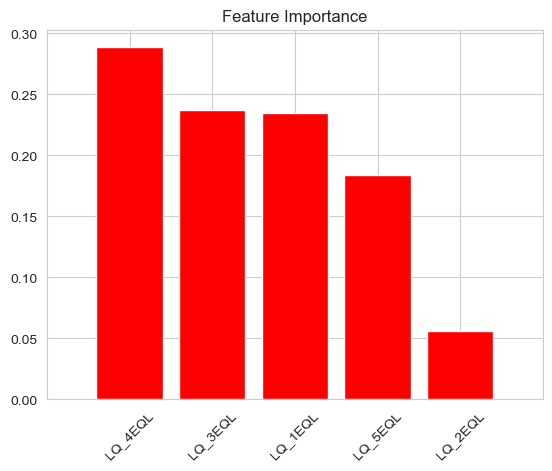

In [12]:
# Feature Importance
plot_feature_importances(df_gb,
                         feature_names=x.columns,
                         x_tick_rotation=45)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

training_accuracy = []
test_accuracy = []

n_settings = [10, 20, 50, 100, 200, 300]
for n in n_settings:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)

    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))


In [30]:
pd.DataFrame({"n_estimators":n_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})


,n_estimators,training accuracy,test accuracy
0,10,0.944180,0.901293
1,20,0.946903,0.899932
2,50,0.950987,0.890402
3,100,0.950987,0.891763
4,200,0.950987,0.894486
5,300,0.950987,0.893125


In [24]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

<AxesSubplot: title={'center': 'Feature Importance'}>

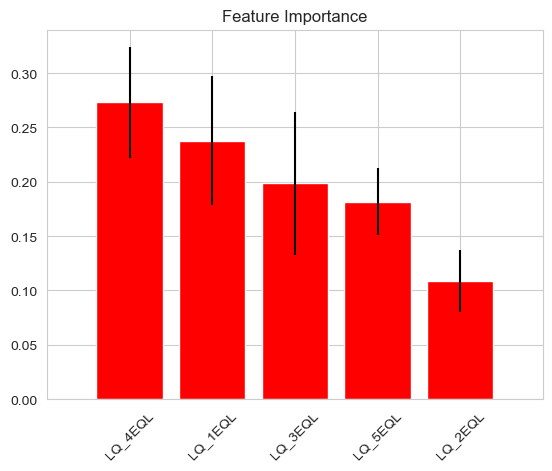

In [16]:
# Feature Importance
plot_feature_importances(clf,
                         feature_names=x.columns,
                         x_tick_rotation=45)

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
le = LabelEncoder()
df['LQ_3EQL'] = le.fit_transform(df['LQ_3EQL'])
df['BP16_1'] = scaler.fit_transform(df['BP16_1'].values.reshape(-1,1))

df['BE8_1'] = le.fit_transform(df['BE8_1'])
df['E_NWT'] = le.fit_transform(df['E_NWT'])
df['L_BR_FQ'] = le.fit_transform(df['L_BR_FQ'])
df['LS_1YR'] = le.fit_transform(df['LS_1YR'])
df['BD1_11'] = le.fit_transform(df['BD1_11'])
df['BS3_1'] = le.fit_transform(df['BS3_1'])

In [56]:
x_3 = df.loc[:, ['BP16_1','E_NWT','L_BR_FQ','LS_1YR','BD1_11','BS3_1']]
y = df.loc[:,'LQ_3EQL']

X_train, X_test, y_train, y_test = train_test_split(x_3, y, train_size=0.5, test_size=0.5, random_state=42)



training_accuracy = []
test_accuracy = []

n_settings = [10, 20, 50, 100, 200, 300]
for n in n_settings:
    clf_3 = GradientBoostingClassifier(n_estimators=n)
    clf_3.fit(X_train, y_train)

    y_train_hat = clf_3.predict(X_train)
    y_test_hat = clf_3.predict(X_test)

    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [57]:
pd.DataFrame({"n_estimators":n_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})


,n_estimators,training accuracy,test accuracy
0,10,0.921035,0.922396
1,20,0.921715,0.922396
2,50,0.921715,0.921035
3,100,0.923758,0.917631
4,200,0.929204,0.912185
5,300,0.933288,0.909462


<AxesSubplot: title={'center': 'Feature Importance'}>

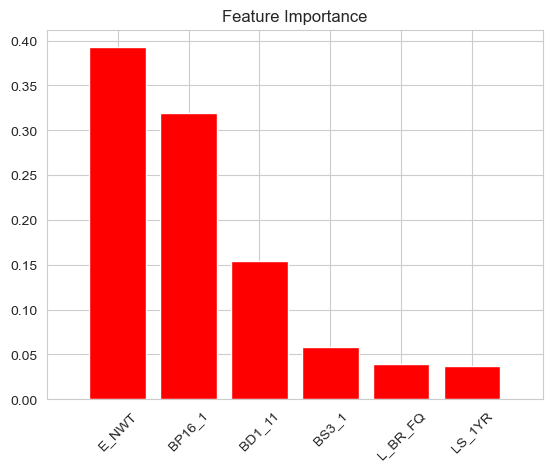

In [59]:
clf_3_best = GradientBoostingClassifier(n_estimators=20)
clf_3_best.fit(x_3, y)
# Feature Importance
plot_feature_importances(clf_3_best,
                         feature_names=x_3.columns,
                         x_tick_rotation=45)

<AxesSubplot: xlabel='BP16_1', ylabel='LQ_3EQL'>

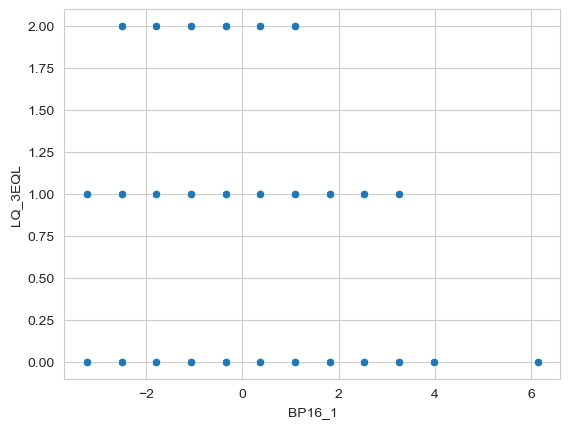

In [21]:
sns.scatterplot(data=df, x=df['BP16_1'], y=df['LQ_3EQL'])

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['LQ_3EQL'] = le.fit_transform(df['LQ_3EQL'])
df['BE3_31'] = le.fit_transform(df['BE3_31'])
df['BE3_32'] = le.fit_transform(df['BE3_32'])
df['BE8_1'] = scaler.fit_transform(df['BE8_1'].values.reshape(-1,1))
df['BE5_1'] = le.fit_transform(df['BE5_1'])
df['pa_aerobic'] = le.fit_transform(df['pa_aerobic'])
df['HE_obe'] = le.fit_transform(df['HE_obe'])


In [47]:
x_1 = df.loc[:, ['BE5_1','BE8_1','BE3_31', 'BE3_32', 'pa_aerobic', 'HE_obe']]
y = df.loc[:, 'LQ_1EQL']

X_train, X_test, y_train, y_test = train_test_split(x_1, y, train_size=0.5, test_size=0.5, random_state=42)

training_accuracy = []
test_accuracy = []

n_settings = [10, 20, 50, 100, 200, 300]
for n in n_settings:
    clf_1 = GradientBoostingClassifier(n_estimators=n)
    clf_1.fit(X_train, y_train)

    y_train_hat = clf_1.predict(X_train)
    y_test_hat = clf_1.predict(X_test)

    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))
pd.DataFrame({"n_estimators": n_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})


,n_estimators,training accuracy,test accuracy
0,10,0.835943,0.820967
1,20,0.838666,0.820286
2,50,0.850238,0.818924
3,100,0.855003,0.815521
4,200,0.860449,0.812117
5,300,0.867937,0.810075


<AxesSubplot: title={'center': 'Feature Importance'}>

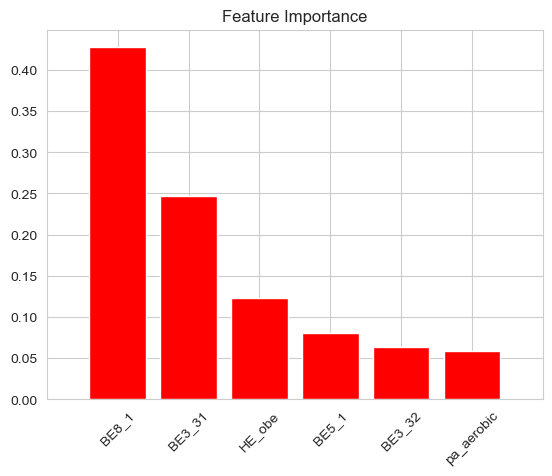

In [60]:
clf_1_best = GradientBoostingClassifier(n_estimators=20)
clf_1_best.fit(x_1, y)

# Feature Importance
plot_feature_importances(clf_1_best,
                         feature_names=x_1.columns,
                         x_tick_rotation=45)

<AxesSubplot: xlabel='BE8_1', ylabel='LQ_1EQL'>

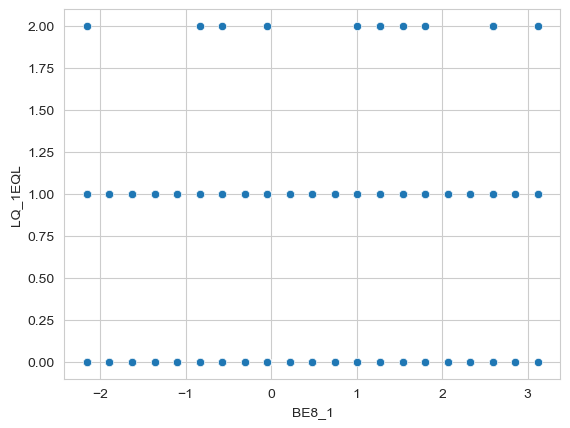

In [41]:
sns.scatterplot(data=df, x=df['BE8_1'], y=df['LQ_1EQL'])